# Fracción de galaxias por host envioroment

- Selecciono las galaxias usando el corte de magnitud. 
- Observo la cantidad de pasivas en cada host usando la etiqueta hecha por anto.
- Luego hago un match con el data set que tiene la etiqueta del host enviorment
- Luego hago un group_by por host environment. 

**Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter
import numpy as np
from itertools import cycle, islice

**Funtions**

In [2]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

### Galaxias en GC

**Load**

In [3]:
path_gal_gru = '../data/tab_gal_gru.dat'
df = pd.read_table(path_gal_gru, sep="\s+", names=['ngc', 'nk', 'alg', 'delg', 'zred', 'rmag', 'gmag', 'r_abs', 'g_abs', 'pasiva'])
id_gc_gal_grup = df.ngc.to_list()

path = '../data/compact_in_all'

df1 = pd.read_table(path, sep="\s+", names=['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b', 'flag',
'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target'])
id_gc_class = df1.i_gru.to_list()

**Lista de GCs descartandos por corte de Magnitud**

In [4]:
diferencia = diff(id_gc_class, id_gc_gal_grup)
df = df.set_index('ngc').drop(diferencia)

In [5]:
df = df.reset_index()

In [6]:
df

,ngc,nk,alg,delg,zred,rmag,gmag,r_abs,g_abs,pasiva
0,1,1,114.844002,45.118000,0.079785,14.719000,15.661000,-22.374979,-21.561102,1
1,1,2,114.839996,45.124001,0.077575,16.379999,16.885000,-20.607855,-20.128399,0
2,1,3,114.849998,45.082001,0.078914,16.813000,17.693001,-20.251556,-19.490927,1
3,1,4,114.819000,45.088001,0.077670,17.100000,17.959999,-19.926037,-19.180386,1
4,2,1,116.553001,21.996000,0.045715,14.289000,15.159000,-21.512625,-20.698204,1
...,...,...,...,...,...,...,...,...,...,...
2007,462,1,250.320007,13.392000,0.050723,13.764000,14.641000,-22.275822,-21.464636,1
2008,462,2,250.335999,13.433000,0.050796,14.616000,15.517000,-21.426989,-20.591886,1
2009,462,3,250.345001,13.456000,0.051681,16.042999,16.818001,-20.038418,-19.325001,1
2010,462,4,250.348007,13.437000,0.051099,16.253000,17.113001,-19.803770,-19.010023,1


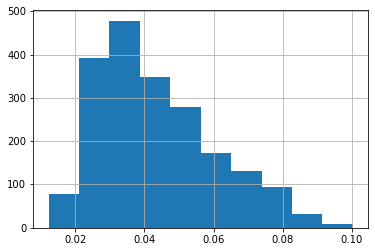

In [7]:
df.zred.hist()

In [8]:
df.zred.min()

0.0123089998960495

In [9]:
df.zred.max()

0.10027799755334854

**Cantidad de pasivas por grupo**

In [10]:
df_pasivas = df.groupby(["ngc"])["pasiva"].sum()

In [11]:
len(df_pasivas.values)

449

In [12]:
df_pasivas = df_pasivas.reset_index()
df_pasivas.head(2)

,ngc,pasiva
0,1,3
1,2,4


**Match**

In [13]:
df1_sort = df1.sort_values('i_gru', ignore_index=True).copy()
df_pasivas_sort = df_pasivas.sort_values('ngc', ignore_index=True).copy()

In [14]:
df1_sort.head(2)

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target
0,1,4,114.842,45.103,0.078292,2.62,25.018,348.679,14.719,0,-22.375,0.143311,0.037275,87.756599,-20.608,Field
1,2,4,116.577,22.020,0.046817,4.09,25.289,274.092,14.289,0,-21.512,0.092313,0.030544,82.543709,-20.895,Loose


In [15]:
df_final = df1_sort.join(df_pasivas_sort)

In [16]:
df_final.shape

(449, 18)

In [17]:
df_final.tail()

,i_gru,n_m,Ra,dec,z,thete_g,mu,sigv,r_b,flag,rabs1,d_ij,tcr,rp,rabs2,Target,ngc,pasiva
444,458,7,243.981,38.537,0.034782,6.091,26.202,138.779,14.577,1,-20.570,0.103047,0.067340,91.589798,-20.088,Field,458,3
445,459,4,244.410,50.641,0.041362,4.748,25.610,552.432,14.146,1,-21.441,0.099179,0.016282,84.761040,-20.121,Loose,459,3
446,460,5,245.283,13.159,0.034352,3.715,24.912,247.585,14.328,1,-20.778,0.079042,0.028953,55.171383,-19.839,Loose,460,2
447,461,4,247.547,36.247,0.075265,3.671,25.664,383.398,14.479,1,-22.477,0.160493,0.037964,118.280334,-20.026,Field,461,2
448,462,5,250.332,13.424,0.050796,4.130,24.858,268.188,13.764,1,-22.276,0.112063,0.037895,90.346329,-21.427,Loose,462,5


In [18]:
df_final.columns

Index(['i_gru', 'n_m', 'Ra', 'dec', 'z', 'thete_g ', 'mu', 'sigv', 'r_b',
       'flag', 'rabs1', 'd_ij', 'tcr', 'rp', 'rabs2', 'Target', 'ngc',
       'pasiva'],
      dtype='object')

**group_by  host environmen**

In [19]:
pasivas_env = df_final.groupby('Target')['pasiva'].sum()
pasivas_env

Target
FIl      151
Field    543
Loose    476
Node     168
VoiR      25
VoiS      61
Name: pasiva, dtype: int64

In [20]:
gxs_env = df_final.groupby('Target')['n_m'].sum()
gxs_env 

Target
FIl      200
Field    847
Loose    626
Node     205
VoiR      39
VoiS      95
Name: n_m, dtype: int64

**Fracción  de galaxias por entorno**

In [21]:
frecuencia = []
for i in range(len(gxs_env)):
    frac = pasivas_env[i]/gxs_env[i]
    frecuencia.append(frac)

**Gráfico 7 - panel superior**

In [22]:
frecuencia

[0.755,
 0.641086186540732,
 0.7603833865814696,
 0.8195121951219512,
 0.6410256410256411,
 0.6421052631578947]

In [23]:
frec = [ 0.8195121951219512, 0.7603833865814696, 0.755,  0.641086186540732, 0.6421052631578947,  0.6410256410256411,]
X = ['Node', 'Loose', 'FIl', 'Field', 'VoidS', 'VoidR']

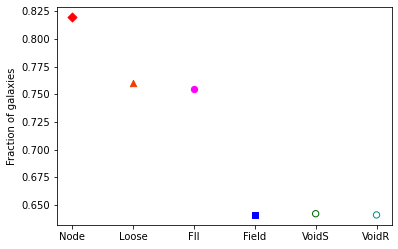

In [24]:
#my_pal = {"Node":"red","FIl":"#EE4000", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
#https://www.webucator.com/article/python-color-constants-module/
plt.scatter(X[0], frec[0], marker='D', s=40, color='r')
plt.scatter(X[1], frec[1], marker='^', s=40, color="#EE4000")
plt.scatter(X[2], frec[2], marker='o', s=40, color="Magenta")
plt.scatter(X[3], frec[3], marker='s', s=40, color='blue')
plt.scatter(X[4], frec[4],  s=40, facecolors='none', edgecolors= '#006400')
plt.scatter(X[5], frec[5],  s=40, facecolors='none', edgecolors='#008B8B')

plt.ylabel('Fraction of galaxies')
plt.savefig('FRAC_GAX_ENV.eps',format='eps')

In [25]:
frecuencia = []
for i in range(df_final.shape[0]):
    frac = df_final.pasiva.iloc[i]/df_final.n_m.iloc[i]
    frecuencia.append(frac)

In [26]:
frecu_03 = list(map(lambda x: round(x, 3), frecuencia))

In [27]:
df_final['frac'] = frecu_03

In [28]:
clases = list(set(df_final.Target))
clases

['Field', 'Loose', 'Node', 'VoiS', 'VoiR', 'FIl']

### Fracción de galaxias pasivas sin distinguir por entorno

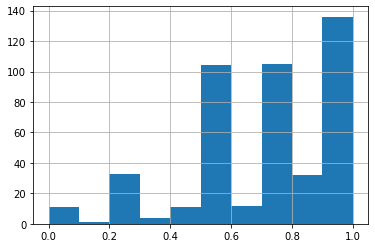

In [29]:
df_final.frac.hist()

In [30]:
clases

['Field', 'Loose', 'Node', 'VoiS', 'VoiR', 'FIl']

### Diagrama de barras  de fracción de  galaxias pasivas por entorno

<Figure size 1440x5760 with 0 Axes>

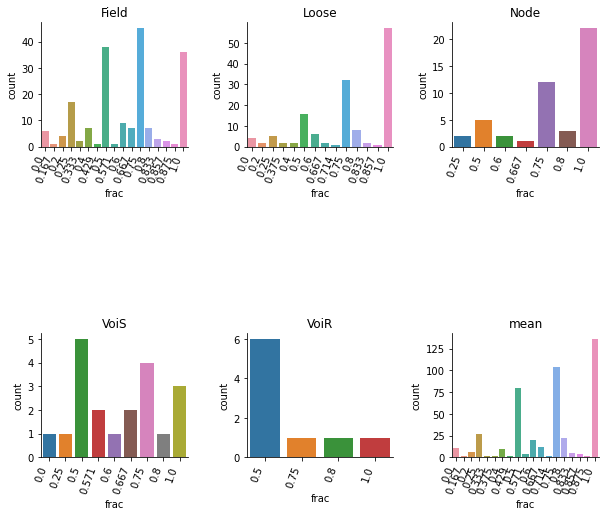

In [31]:
plt.rcParams['figure.figsize'] = 10, 8
plt.figure(figsize=(20,80))


####subfiguras
f, ax = plt.subplots(2,3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=1.5)

df_bar = df_final[df_final['Target']==clases[0]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=70, ha="right")
ax[0,0].set_title(clases[0])


df_bar = df_final[df_final['Target']==clases[1]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,1].set_title(clases[1])



df_bar = df_final[df_final['Target']==clases[2]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,2].set_title(clases[2])



df_bar = df_final[df_final['Target']==clases[3]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,0].set_title(clases[3])


df_bar = df_final[df_final['Target']==clases[4]].sort_values('frac')
sns.countplot(x="frac", data= df_bar, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,1].set_title(clases[4])


sns.countplot(x="frac", data= df_final, ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,2].set_title('mean')

plt.savefig('bar_frac.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

In [32]:
frac_index = list(set(df_final.frac))

### Diagrama de barras  de fracción de  galaxias pasivas por entorno

<Figure size 1440x5760 with 0 Axes>

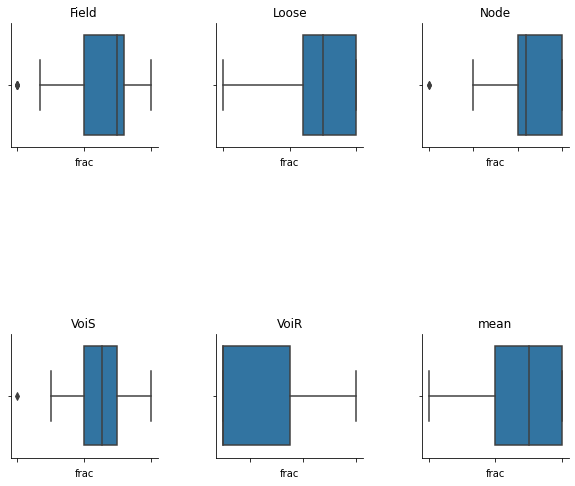

In [33]:
plt.figure(figsize=(20,80))


####subfiguras
f, ax = plt.subplots(2,3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=1.5)

df_bar = df_final[df_final['Target']==clases[0]].sort_values('frac')
sns.boxplot(x="frac", data=df_bar, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=70, ha="right")
ax[0,0].set_title(clases[0])


df_bar = df_final[df_final['Target']==clases[1]].sort_values('frac')
sns.boxplot(x="frac", data=df_bar, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,1].set_title(clases[1])



df_bar = df_final[df_final['Target']==clases[2]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[0,2])
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[0,2].set_title(clases[2])



df_bar = df_final[df_final['Target']==clases[3]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,0].set_title(clases[3])


df_bar = df_final[df_final['Target']==clases[4]].sort_values('frac')
sns.boxplot(x="frac", data= df_bar, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,1].set_title(clases[4])


sns.boxplot(x="frac", data= df_final, ax=ax[1,2])
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=70, ha="right")
sns.despine()
ax[1,2].set_title('mean')

plt.savefig('hist_box.pdf', format ='pdf',  bbox_inches='tight')
plt.show()

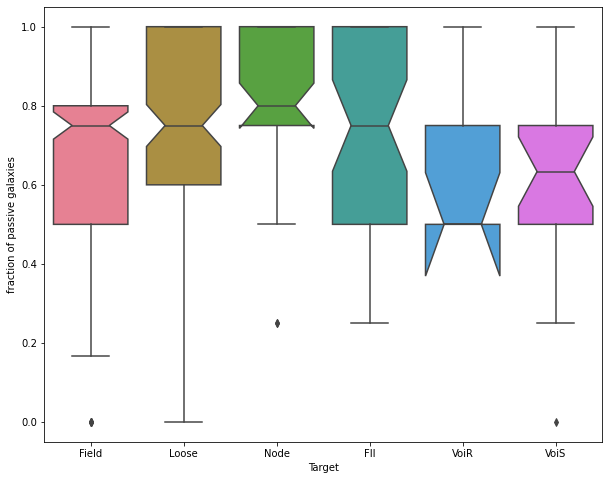

In [34]:
sns.boxplot(x='Target', y="frac", data=df_final,  palette="husl", notch= True)
plt.ylabel('fraction of passive galaxies')
plt.savefig('box_frac.pdf', format ='pdf',  bbox_inches='tight')

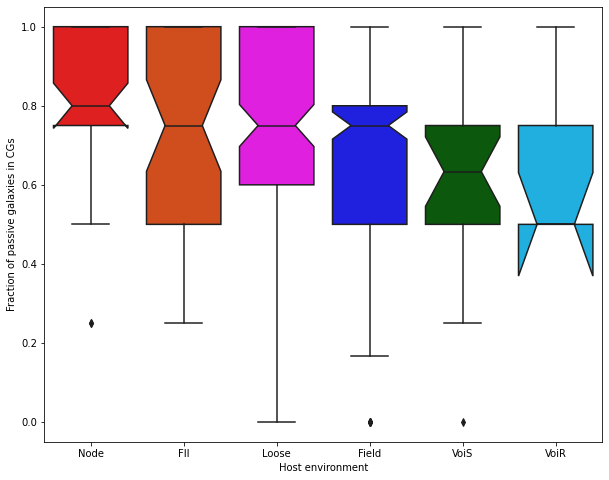

In [35]:
clases = ['Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR']
my_pal = {"Node":"red","FIl":"#EE4000", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
sns.boxplot(x=df_final.Target, y=df_final.frac, notch= True, order=[ 
                 'Node', 'FIl', 'Loose', 'Field', 'VoiS', 'VoiR'], palette=my_pal)
plt.ylabel('Fraction of passive galaxies in CGs')
plt.xlabel('Host environment')
plt.savefig('box_frac.pdf', format ='pdf',  bbox_inches='tight')

In [36]:
set(df_final.Target)

{'FIl', 'Field', 'Loose', 'Node', 'VoiR', 'VoiS'}

In [37]:
from matplotlib.cbook import boxplot_stats

In [38]:
Node = df_final[df_final['Target']=='Node']
display('Node-frac')
display(boxplot_stats(Node.frac)[0]['med'],
boxplot_stats(Node.frac)[0]['cihi']-boxplot_stats(Node.frac)[0]['med'])

FIl = df_final[df_final['Target']=='FIl']
display('FIl-frac')
display(boxplot_stats(FIl.frac)[0]['med'],
boxplot_stats(FIl.frac)[0]['cihi']-boxplot_stats(FIl.frac)[0]['med'])

Loose = df_final[df_final['Target']=='Loose']
display('Loose-frac')
display(boxplot_stats(Loose.frac)[0]['med'],
boxplot_stats(Loose.frac)[0]['cihi']-boxplot_stats(Loose.frac)[0]['med'])

Field = df_final[df_final['Target']=='Field']
display('Field-frac')
display(boxplot_stats(Field.frac)[0]['med'],
boxplot_stats(Field.frac)[0]['cihi']-boxplot_stats(Field.frac)[0]['med'])

VoiS = df_final[df_final['Target']=='VoiS']
display('VoiS-frac')
display(boxplot_stats(VoiS.frac)[0]['med'],
boxplot_stats(VoiS.frac)[0]['cihi']-boxplot_stats(VoiS.frac)[0]['med'])

VoiR = df_final[df_final['Target']=='VoiR']
display('VoiR-frac')
display(boxplot_stats(VoiR.frac)[0]['med'],
boxplot_stats(VoiR.frac)[0]['cihi']-boxplot_stats(VoiR.frac)[0]['med'])

'Node-frac'

0.8

0.05725200916292361

'FIl-frac'

0.75

0.11574193558159429

'Loose-frac'

0.75

0.05307568719695088

'Field-frac'

0.75

0.03444293117638786

'VoiS-frac'

0.6335

0.0877656681168667

'VoiR-frac'

0.5

0.13083333333333336

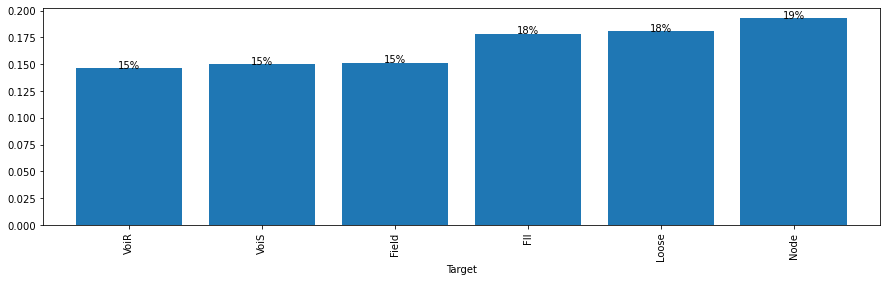

In [39]:
df_bar = df_final.groupby(["Target"])["frac"].mean()
# Normalize result
df_bar_pct = df_bar.sort_values().div(df_bar.sum(), axis=0)


ax = df_bar_pct.plot(kind='bar', figsize=(15,4), width=0.8)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.00), ha='center')
    
plt.savefig('bar.eps',format='eps')

# Tomando 7 GCs de forma aleatoria de cada entorno. 

**Submuestras**

In [40]:
df_c0 = df_final[df_final['Target']==clases[0]].sort_values('frac') # Tomo la clase cero
c = list(range(0, df_c0.shape[0])) # Defino una lista haciendo uso de la dim del df_c0
aleatorios = random.sample(c, df_c0.shape[0]) # A esa lista c le doy un 'orden' aleatorio
index = aleatorios 
dfa_c0 = pd.DataFrame(df_c0.frac.values, index=index) # Esa nueva lista la uso para definir el index de un nuevo df_c0 pero sin orden
dfa_c0 = dfa_c0[0:8] # Tomo 7 gcs de la clase, entiendase clase a los GCs que pertenecen a un dado entorno


df_c1 = df_final[df_final['Target']==clases[1]].sort_values('frac')
c = list(range(0, df_c1.shape[0]))
aleatorios = random.sample(c, df_c1.shape[0])
index = aleatorios
dfa_c1 = pd.DataFrame(df_c1.frac.values, index=index)
dfa_c1 = dfa_c1[0:8]


df_c2 = df_final[df_final['Target']==clases[2]].sort_values('frac')
c = list(range(0, df_c2.shape[0]))
aleatorios = random.sample(c, df_c2.shape[0])
index = aleatorios
dfa_c2 = pd.DataFrame(df_c2.frac.values, index=index)
dfa_c2 = dfa_c2[0:8]


df_c3 = df_final[df_final['Target']==clases[3]].sort_values('frac')
c = list(range(0, df_c3.shape[0]))
aleatorios = random.sample(c, df_c3.shape[0])
index = aleatorios
dfa_c3 = pd.DataFrame(df_c3.frac.values, index=index)
dfa_c3 = dfa_c3[0:8]


df_c4 = df_final[df_final['Target']==clases[4]].sort_values('frac')
c = list(range(0, df_c4.shape[0]))
aleatorios = random.sample(c, df_c4.shape[0])
index = aleatorios
dfa_c4 = pd.DataFrame(df_c4.frac.values, index=index)
dfa_c4 = dfa_c4[0:8]


df_c5 = df_final[df_final['Target']==clases[5]].sort_values('frac')
c = list(range(0, df_c5.shape[0]))
aleatorios = random.sample(c, df_c5.shape[0])
index = aleatorios
dfa_c5 = pd.DataFrame(df_c5.frac.values, index=index)
dfa_c5 = dfa_c5[0:8]

In [41]:
df_frac = pd.DataFrame(dfa_c0.values, columns=['VoidR'])
df_frac['VoidS'] = dfa_c1.values
df_frac['Loose'] = dfa_c2.values
df_frac['Field'] = dfa_c3.values
df_frac['Node'] = dfa_c4.values
df_frac['FIl'] = dfa_c5.values

In [42]:
df_frac

,VoidR,VoidS,Loose,Field,Node,FIl
0,0.25,0.25,0.00,0.000,0.000,0.50
1,0.25,0.25,0.00,0.000,0.250,0.50
2,0.50,0.40,0.00,0.000,0.500,0.50
3,0.50,0.50,0.00,0.000,0.500,0.50
4,0.50,0.50,0.20,0.000,0.500,0.50
5,0.50,0.50,0.20,0.000,0.500,0.50
6,0.50,0.50,0.25,0.167,0.500,0.75
7,0.60,0.50,0.25,0.200,0.571,0.80


In [43]:
voidR = pd.DataFrame(Counter(df_frac.VoidR).values(), index=Counter(df_frac.VoidR).keys(), columns=['voidR'])
voidS = pd.DataFrame(Counter(df_frac.VoidS).values(), index=Counter(df_frac.VoidS).keys(), columns=['voidS'])
Loose = pd.DataFrame(Counter(df_frac.Loose).values(), index=Counter(df_frac.Loose).keys(), columns=['Loose'])
Field = pd.DataFrame(Counter(df_frac.Field).values(), index=Counter(df_frac.Field).keys(), columns=['Field'])
Node = pd.DataFrame(Counter(df_frac.Node).values(), index=Counter(df_frac.Node).keys(), columns=['Node'])
FIl = pd.DataFrame(Counter(df_frac.FIl).values(), index=Counter(df_frac.FIl).keys(), columns=['FIl'])

In [44]:
df_12 = pd.concat([Node, FIl, Loose, Field, voidS, voidR], axis=1)

In [45]:
df_12

,Node,FIl,Loose,Field,voidS,voidR
0.000,1.0,NaN,4.0,6.0,NaN,NaN
0.167,NaN,NaN,NaN,1.0,NaN,NaN
0.200,NaN,NaN,2.0,1.0,NaN,NaN
0.250,1.0,NaN,2.0,NaN,2.0,2.0
0.400,NaN,NaN,NaN,NaN,1.0,NaN
0.500,5.0,6.0,NaN,NaN,5.0,5.0
0.571,1.0,NaN,NaN,NaN,NaN,NaN
0.600,NaN,NaN,NaN,NaN,NaN,1.0
0.750,NaN,1.0,NaN,NaN,NaN,NaN
0.800,NaN,1.0,NaN,NaN,NaN,NaN


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


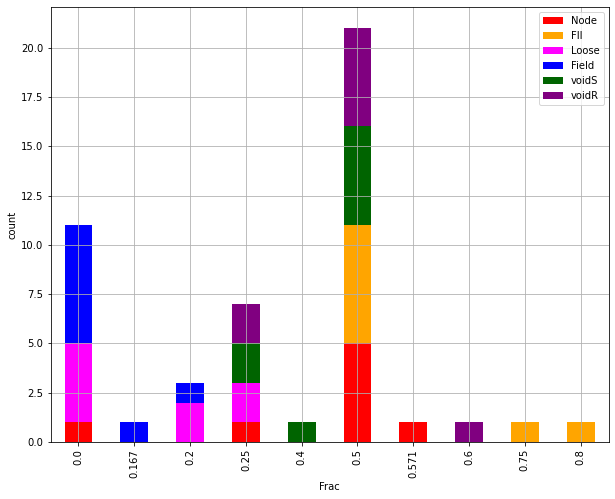

In [46]:
# Make a list by cycling through the colors you care about
# to match the length of your data.
from itertools import cycle, islice
my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12.plot(kind='bar', stacked=True, color=my_colors, grid=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.savefig('cg7.eps',format='eps')

# Misma figura pero sin considerar submuestras

In [47]:
df_c0 = df_final[df_final['Target']==clases[0]].sort_values('frac') # Tomo la clase cero
dfa_c0 = pd.DataFrame(df_c0.frac.values) # Esa nueva lista la uso para definir el index de un nuevo df_c0 pero sin orden

df_c1 = df_final[df_final['Target']==clases[1]].sort_values('frac')
dfa_c1 = pd.DataFrame(df_c1.frac.values)


df_c2 = df_final[df_final['Target']==clases[2]].sort_values('frac')
dfa_c2 = pd.DataFrame(df_c2.frac.values)


df_c3 = df_final[df_final['Target']==clases[3]].sort_values('frac')
dfa_c3 = pd.DataFrame(df_c3.frac.values)


df_c4 = df_final[df_final['Target']==clases[4]].sort_values('frac')
dfa_c4 = pd.DataFrame(df_c4.frac.values)


df_c5 = df_final[df_final['Target']==clases[5]].sort_values('frac')
dfa_c5 = pd.DataFrame(df_c5.frac.values)

#########################################################################################
voidR = pd.DataFrame(Counter(df_c0.frac).values(), index=Counter(df_c0.frac).keys(), columns=['voidR'])
voidS = pd.DataFrame(Counter(df_c1.frac).values(), index=Counter(df_c1.frac).keys(), columns=['voidS'])
Loose = pd.DataFrame(Counter(df_c2.frac).values(), index=Counter(df_c2.frac).keys(), columns=['Loose'])
Field = pd.DataFrame(Counter(df_c3.frac).values(), index=Counter(df_c3.frac).keys(), columns=['Field'])
Node = pd.DataFrame(Counter(df_c4.frac).values(), index=Counter(df_c4.frac).keys(), columns=['Node'])
FIl = pd.DataFrame(Counter(df_c5.frac).values(), index=Counter(df_c5.frac).keys(), columns=['FIl'])


df_12_19 = pd.concat([Node, FIl, Loose, Field, voidS, voidR], axis=1)
display(df_12_19.head(2))

,Node,FIl,Loose,Field,voidS,voidR
0.000,1.0,NaN,4.0,6.0,NaN,NaN
0.167,NaN,NaN,NaN,1.0,NaN,NaN


In [48]:
df_12_19.voidS

0.000     NaN
0.167     NaN
0.200     NaN
0.250     2.0
0.333     NaN
0.375     NaN
0.400     1.0
0.429     NaN
0.500    10.0
0.571     1.0
0.600     2.0
0.667     NaN
0.714     NaN
0.750    10.0
0.800     2.0
0.833     NaN
0.857     1.0
0.875     NaN
1.000    17.0
Name: voidS, dtype: float64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


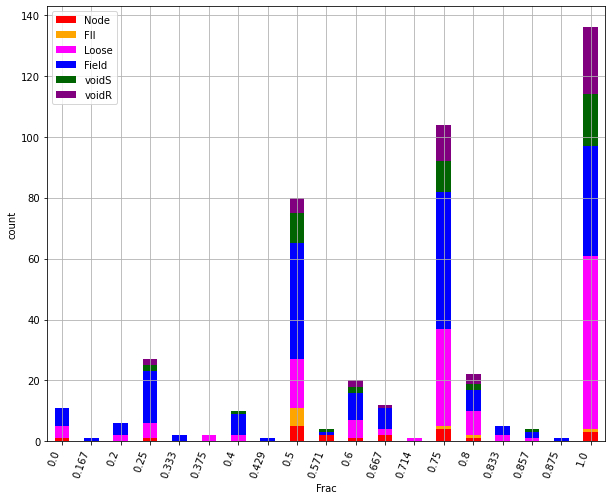

In [49]:
# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_19)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12_19.plot(kind='bar', stacked=True, color=my_colors, grid=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=70, ha="right")
#plt.xlim(0., 0.4)
plt.savefig('cg1219.eps',format='eps')


In [50]:
df_12_19.head(2)

,Node,FIl,Loose,Field,voidS,voidR
0.000,1.0,NaN,4.0,6.0,NaN,NaN
0.167,NaN,NaN,NaN,1.0,NaN,NaN


In [51]:
df_12_22 = df_12_19.reset_index().copy()
df_12_22 = df_12_22.rename(columns={'index': 'frac'})
df_12_22 = df_12_22.fillna(0)
df_12_22.head(2)

,frac,Node,FIl,Loose,Field,voidS,voidR
0,0.000,1.0,0.0,4.0,6.0,0.0,0.0
1,0.167,0.0,0.0,0.0,1.0,0.0,0.0


https://kodlogs.com/33984/the-truth-value-of-an-array-with-more-than-one-element-is-ambiguous-use-a-any-or-a-all

In [52]:
df_12_22.loc[df_12_22.frac < 0.2] 

,frac,Node,FIl,Loose,Field,voidS,voidR
0,0.000,1.0,0.0,4.0,6.0,0.0,0.0
1,0.167,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
df_12_22.loc[df_12_22.frac < 0.2, 'frac'] 

0    0.000
1    0.167
Name: frac, dtype: float64

In [54]:
df_12_22

,frac,Node,FIl,Loose,Field,voidS,voidR
0,0.000,1.0,0.0,4.0,6.0,0.0,0.0
1,0.167,0.0,0.0,0.0,1.0,0.0,0.0
2,0.200,0.0,0.0,2.0,4.0,0.0,0.0
3,0.250,1.0,0.0,5.0,17.0,2.0,2.0
4,0.333,0.0,0.0,0.0,2.0,0.0,0.0
5,0.375,0.0,0.0,2.0,0.0,0.0,0.0
6,0.400,0.0,0.0,2.0,7.0,1.0,0.0
7,0.429,0.0,0.0,0.0,1.0,0.0,0.0
8,0.500,5.0,6.0,16.0,38.0,10.0,5.0
9,0.571,2.0,0.0,0.0,1.0,1.0,0.0


In [55]:
# Binning of the data based on a condition
df_12_22.loc[df_12_22.frac < 0.2, 'frac'] = 10
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.2, df_12_22.frac < 0.4), 'frac'] = 20
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.4, df_12_22.frac < 0.6), 'frac'] = 30
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.6, df_12_22.frac < 0.8), 'frac'] = 40
df_12_22.loc[np.logical_and(df_12_22.frac >= 0.8, df_12_22.frac <= 1.0), 'frac'] = 50
 
# Grouping and couting
df_12_22 = df_12_22.groupby('frac').sum()

In [56]:
df_12_22

,Node,FIl,Loose,Field,voidS,voidR
frac,,,,,,
10.0,1.0,0.0,4.0,7.0,0.0,0.0
20.0,1.0,0.0,9.0,23.0,2.0,2.0
30.0,7.0,6.0,18.0,47.0,12.0,5.0
40.0,7.0,1.0,41.0,61.0,12.0,15.0
50.0,4.0,2.0,68.0,49.0,20.0,25.0


In [57]:
#bines = ['bin 1', 'bin 2', 'bin 3', 'bin 4', 'bin 5' ]
bines = ['[0 - 0.2)', '[0.2 - 0.4)', '[0.4 - 0.6)', '[0.6 - 0.8)', '[0.8 - 1]' ]

In [58]:
df_12_22['bines'] = bines

In [59]:
df_fracciones_bin =  df_12_22.reset_index().set_index('bines').drop('frac', axis=1)

In [60]:
df_fracciones_bin 

,Node,FIl,Loose,Field,voidS,voidR
bines,,,,,,
[0 - 0.2),1.0,0.0,4.0,7.0,0.0,0.0
[0.2 - 0.4),1.0,0.0,9.0,23.0,2.0,2.0
[0.4 - 0.6),7.0,6.0,18.0,47.0,12.0,5.0
[0.6 - 0.8),7.0,1.0,41.0,61.0,12.0,15.0
[0.8 - 1],4.0,2.0,68.0,49.0,20.0,25.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


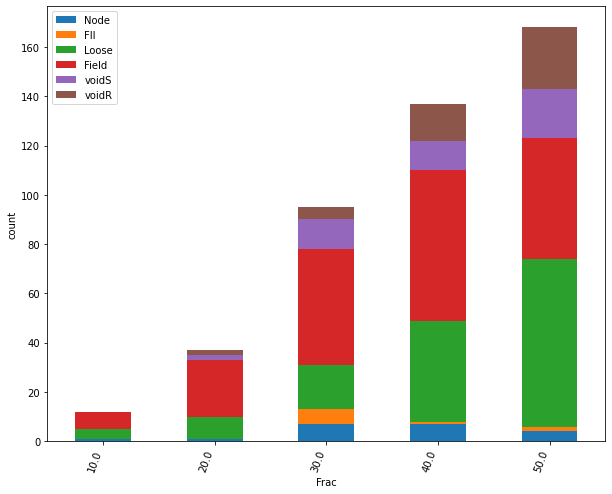

In [61]:
#my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_22)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_12_22.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=70, ha="right")
#plt.xlim(0., 0.4)
plt.savefig('cg1222.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


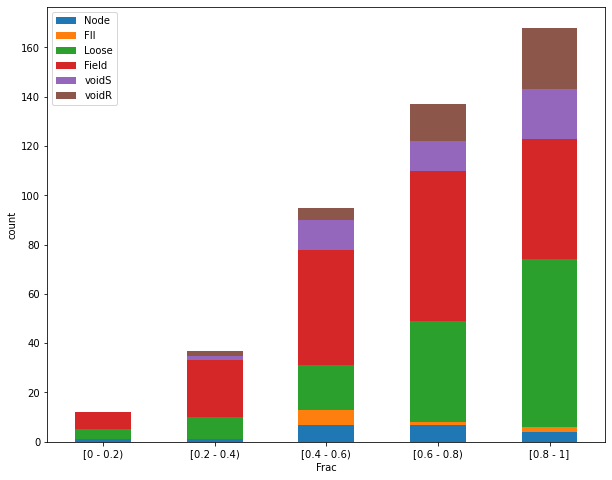

In [62]:
#my_colors = list(islice(cycle(["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]), None, len(df_12_22)))
#color = ["red", "Orange", "Magenta", "blue", "Darkgreen", "Purple"]
df_fracciones_bin.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('count')
plt.xticks(rotation=0)
#plt.xlim(0., 0.4)
plt.savefig('cg1222.eps',format='eps')

In [63]:
df_frac_bin_nor_bar = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=1)
df_frac_bin_nor_bar

,Node,FIl,Loose,Field,voidS,voidR
bines,,,,,,
[0 - 0.2),0.083333,0.000000,0.333333,0.583333,0.000000,0.000000
[0.2 - 0.4),0.027027,0.000000,0.243243,0.621622,0.054054,0.054054
[0.4 - 0.6),0.073684,0.063158,0.189474,0.494737,0.126316,0.052632
[0.6 - 0.8),0.051095,0.007299,0.299270,0.445255,0.087591,0.109489
[0.8 - 1],0.023810,0.011905,0.404762,0.291667,0.119048,0.148810


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


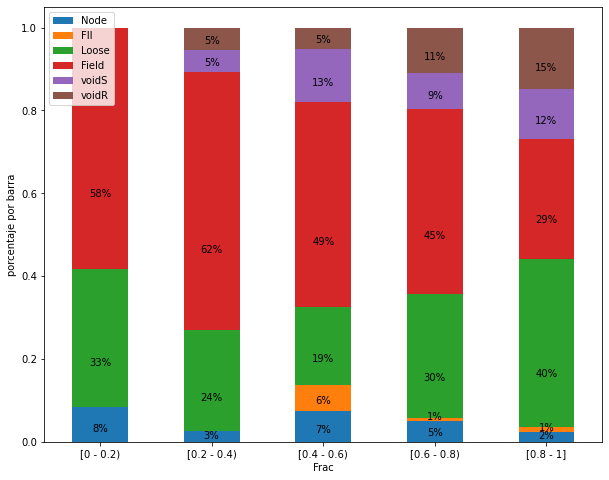

In [64]:
ax = df_frac_bin_nor_bar.plot(kind='bar', stacked=True)
plt.xlabel('Frac')
plt.ylabel('porcentaje por barra')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*0.30), ha='center')

plt.savefig('df_frac_bin_nor_bar.eps',format='eps')

In [65]:
df_frac_bin_nor_env = df_fracciones_bin.apply(lambda x: x/np.sum(x), axis=0)
df_frac_bin_nor_env

,Node,FIl,Loose,Field,voidS,voidR
bines,,,,,,
[0 - 0.2),0.05,0.000000,0.028571,0.037433,0.000000,0.000000
[0.2 - 0.4),0.05,0.000000,0.064286,0.122995,0.043478,0.042553
[0.4 - 0.6),0.35,0.666667,0.128571,0.251337,0.260870,0.106383
[0.6 - 0.8),0.35,0.111111,0.292857,0.326203,0.260870,0.319149
[0.8 - 1],0.20,0.222222,0.485714,0.262032,0.434783,0.531915


https://www.webucator.com/article/python-color-constants-module/

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


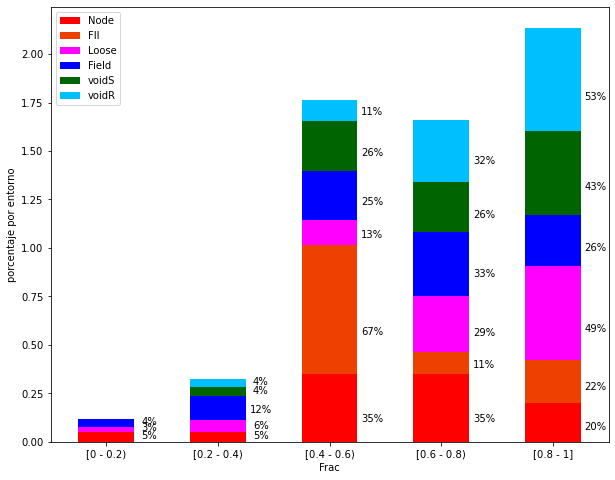

In [66]:
my_pal = {"Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"}
#color = ["Node":"red","FIl":"Orange", "Loose":"Magenta", "Field":"blue", "VoiS":"Darkgreen", "VoiR":"Deepskyblue"]
color = ["red", "#EE4000", "Magenta", "blue", "Darkgreen", "Deepskyblue"]
ax = df_frac_bin_nor_env.plot(kind='bar', stacked=True, color=color)

plt.xlabel('Frac')
plt.ylabel('porcentaje por entorno')
plt.xticks(rotation=0)
#plt.xlim(1, 2)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0.0: 
        continue
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/0.79, y + height*0.30), ha='center')
    
plt.savefig('df_frac_bin_nor_env.eps',format='eps')

In [67]:
df_fracciones_bin

,Node,FIl,Loose,Field,voidS,voidR
bines,,,,,,
[0 - 0.2),1.0,0.0,4.0,7.0,0.0,0.0
[0.2 - 0.4),1.0,0.0,9.0,23.0,2.0,2.0
[0.4 - 0.6),7.0,6.0,18.0,47.0,12.0,5.0
[0.6 - 0.8),7.0,1.0,41.0,61.0,12.0,15.0
[0.8 - 1],4.0,2.0,68.0,49.0,20.0,25.0
